In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances


data = pd.read_csv('creditcard.csv')


In [3]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Get the number of rows and columns in the dataset
num_rows, num_cols = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Get the column names
column_names = data.columns
print("Column names:")
print(column_names)

# Get summary statistics of the dataset
summary_stats = data.describe()
print("Summary statistics:")
print(summary_stats)


Number of rows: 284807
Number of columns: 31
Column names:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.00

No Frauds 284315  and  99.83 % of the dataset
Frauds 492  and  0.17 % of the dataset


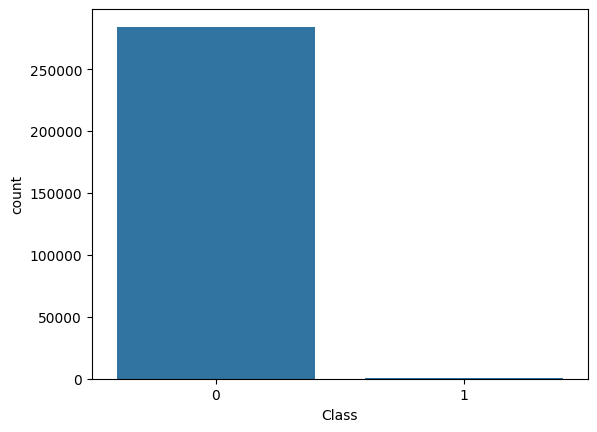

In [6]:
sns.countplot(x='Class', data=data)
print('No Frauds',data['Class'].value_counts()[0],' and ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', data['Class'].value_counts()[1],' and ',round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

C:\Users\Javad\AppData\Local\Temp\ipykernel_5980\2977666189.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\Javad\AppData\Local\Temp\ipykernel_5980\2977666189.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


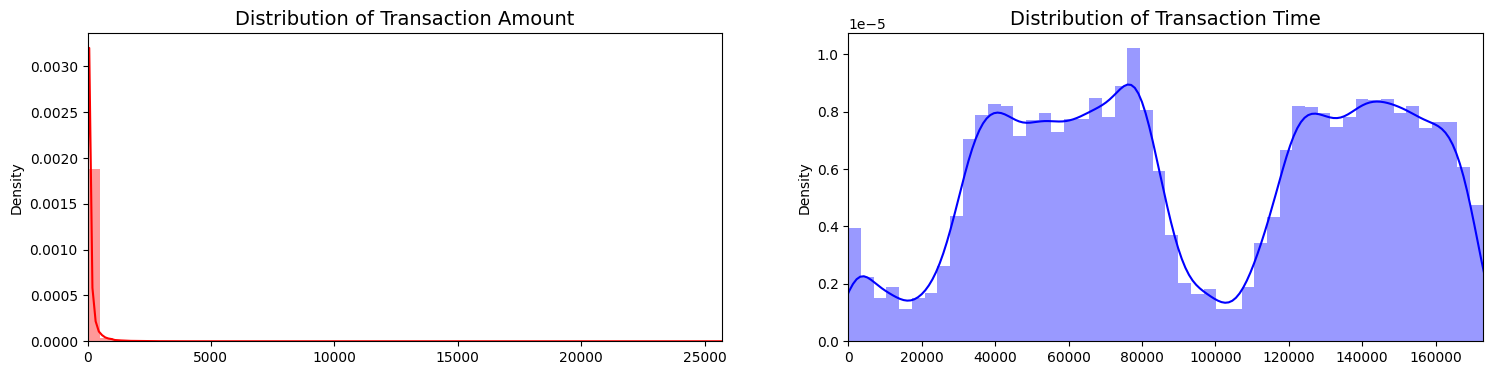

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [8]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler
data_kmeans=data.copy()
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data_kmeans['scaled_amount'] = rob_scaler.fit_transform(data_kmeans['Amount'].values.reshape(-1,1))
data_kmeans['scaled_time'] = rob_scaler.fit_transform(data_kmeans['Time'].values.reshape(-1,1))

data_kmeans.drop(['Time','Amount'], axis=1, inplace=True)

**clustering using K_Means**

In [9]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
data_x=data_kmeans.copy().drop(['Class'],axis=1)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data_x)
# Get the cluster labels
cluster_labels = kmeans.labels_
data_kmeans['Cluster'] = cluster_labels

# Separate the clusters
cluster_1 = data_kmeans[data_kmeans['Cluster'] == 0]
cluster_2 = data_kmeans[data_kmeans['Cluster'] == 1]

cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)
# Calculate the pairwise distances between data points and cluster centers
distances = pairwise_distances(data_x, cluster_centers)

# Calculate the average distance for each cluster
avg_distances = [np.mean(distances[data_kmeans['Cluster'] == i]) for i in range(len(cluster_centers))]

# Print the average distances
for i, avg_distance in enumerate(avg_distances):
    print(f"Average distance for Cluster {i+1}: {avg_distance}")



Cluster Centers:
[[ 5.13833973e-02  9.04482831e-02  3.60394757e-02 -1.59593054e-02
   4.80923101e-02 -2.53756269e-02 -4.97598998e-02  1.33513080e-02
   4.22846801e-03  1.07656452e-02 -7.45563158e-04  1.00869192e-03
  -3.63341831e-04 -3.98953646e-03  4.86095732e-04 -9.71166212e-04
  -1.08200118e-03 -8.20675965e-04  3.83503020e-03 -2.79118345e-02
  -7.73227040e-03  6.13128747e-03  7.04340361e-03 -5.89593913e-04
   2.46800139e-03 -3.73138773e-04 -4.26365409e-04 -1.29061563e-03
   5.78778255e-01  1.19233061e-01]
 [-2.60554312e+00 -4.58644064e+00 -1.82748539e+00  8.09262533e-01
  -2.43865906e+00  1.28674423e+00  2.52321900e+00 -6.77016515e-01
  -2.14416646e-01 -5.45903037e-01  3.78059267e-02 -5.11486285e-02
   1.84242938e-02  2.02300934e-01 -2.46488838e-02  4.92457792e-02
   5.48659853e-02  4.16147379e-02 -1.94466249e-01  1.41534994e+00
   3.92087035e-01 -3.10904586e-01 -3.57156061e-01  2.98970570e-02
  -1.25147117e-01  1.89210759e-02  2.16200858e-02  6.54443819e-02
   1.85909910e+01  1.027

In [10]:
from sklearn.cluster import KMeans
data_x=data_kmeans.copy().drop(['Class'],axis=1)
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(data_x)
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the dataframe
data_kmeans['Cluster'] = cluster_labels

# Separate the clusters
cluster_1 = data_kmeans[data_kmeans['Cluster'] == 0]
cluster_2 = data_kmeans[data_kmeans['Cluster'] == 1]
cluster_3 = data_kmeans[data_kmeans['Cluster'] == 2]
cluster_4 = data_kmeans[data_kmeans['Cluster'] == 3]
print('No Frauds',cluster_1['Class'].value_counts()[0],' and ', round(cluster_1['Class'].value_counts()[0]/len(cluster_1) * 100,2), '% of the cluster_1')
print('Frauds', cluster_1['Class'].value_counts()[1],' and ',round(cluster_1['Class'].value_counts()[1]/len(cluster_1) * 100,2), '% of the cluster_1')

print('No Frauds',cluster_2['Class'].value_counts()[0],' and ', round(cluster_2['Class'].value_counts()[0]/len(cluster_2) * 100,2), '% of the cluster_2')
print('Frauds', cluster_2['Class'].value_counts()[1],' and ',round(cluster_2['Class'].value_counts()[1]/len(cluster_2) * 100,2), '% of the cluster_2')

print('No Frauds',cluster_3['Class'].value_counts()[0],' and ', round(cluster_3['Class'].value_counts()[0]/len(cluster_3) * 100,2), '% of the cluster_3')   
print('Frauds', cluster_3['Class'].value_counts()[1],' and ',round(cluster_3['Class'].value_counts()[1]/len(cluster_3) * 100,2), '% of the cluster_3')

print('No Frauds',cluster_4['Class'].value_counts()[0],' and ', round(cluster_4['Class'].value_counts()[0]/len(cluster_4) * 100,2), '% of the cluster_4')
print('Frauds', cluster_4['Class'].value_counts()[1],' and ',round(cluster_4['Class'].value_counts()[1]/len(cluster_4) * 100,2), '% of the cluster_4')

No Frauds 144223  and  99.77 % of the cluster_1
Frauds 327  and  0.23 % of the cluster_1
No Frauds 11230  and  99.62 % of the cluster_2
Frauds 43  and  0.38 % of the cluster_2
No Frauds 128234  and  99.91 % of the cluster_3
Frauds 121  and  0.09 % of the cluster_3
No Frauds 628  and  99.84 % of the cluster_4
Frauds 1  and  0.16 % of the cluster_4


c:\Users\Javad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Javad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Javad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Javad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

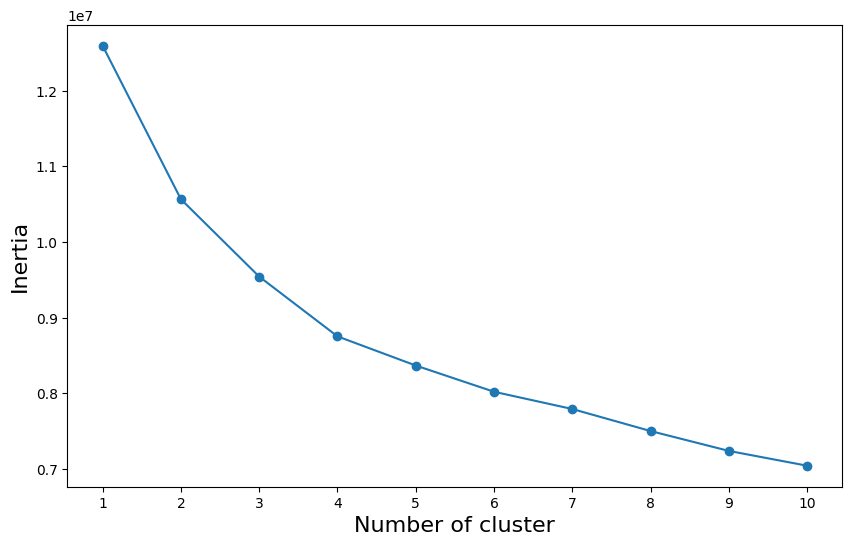

In [11]:
SEED = 123
inertia = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=SEED).fit(data_kmeans)
    inertia[k] = kmeans.inertia_ 

plt.figure(figsize=(10, 6))
plt.plot(list(inertia.keys()), list(inertia.values()), marker='o')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.xticks(list(inertia.keys()))
plt.show();

Text(0.5, 1.0, 'cluster1 Correlation Matrix \n')

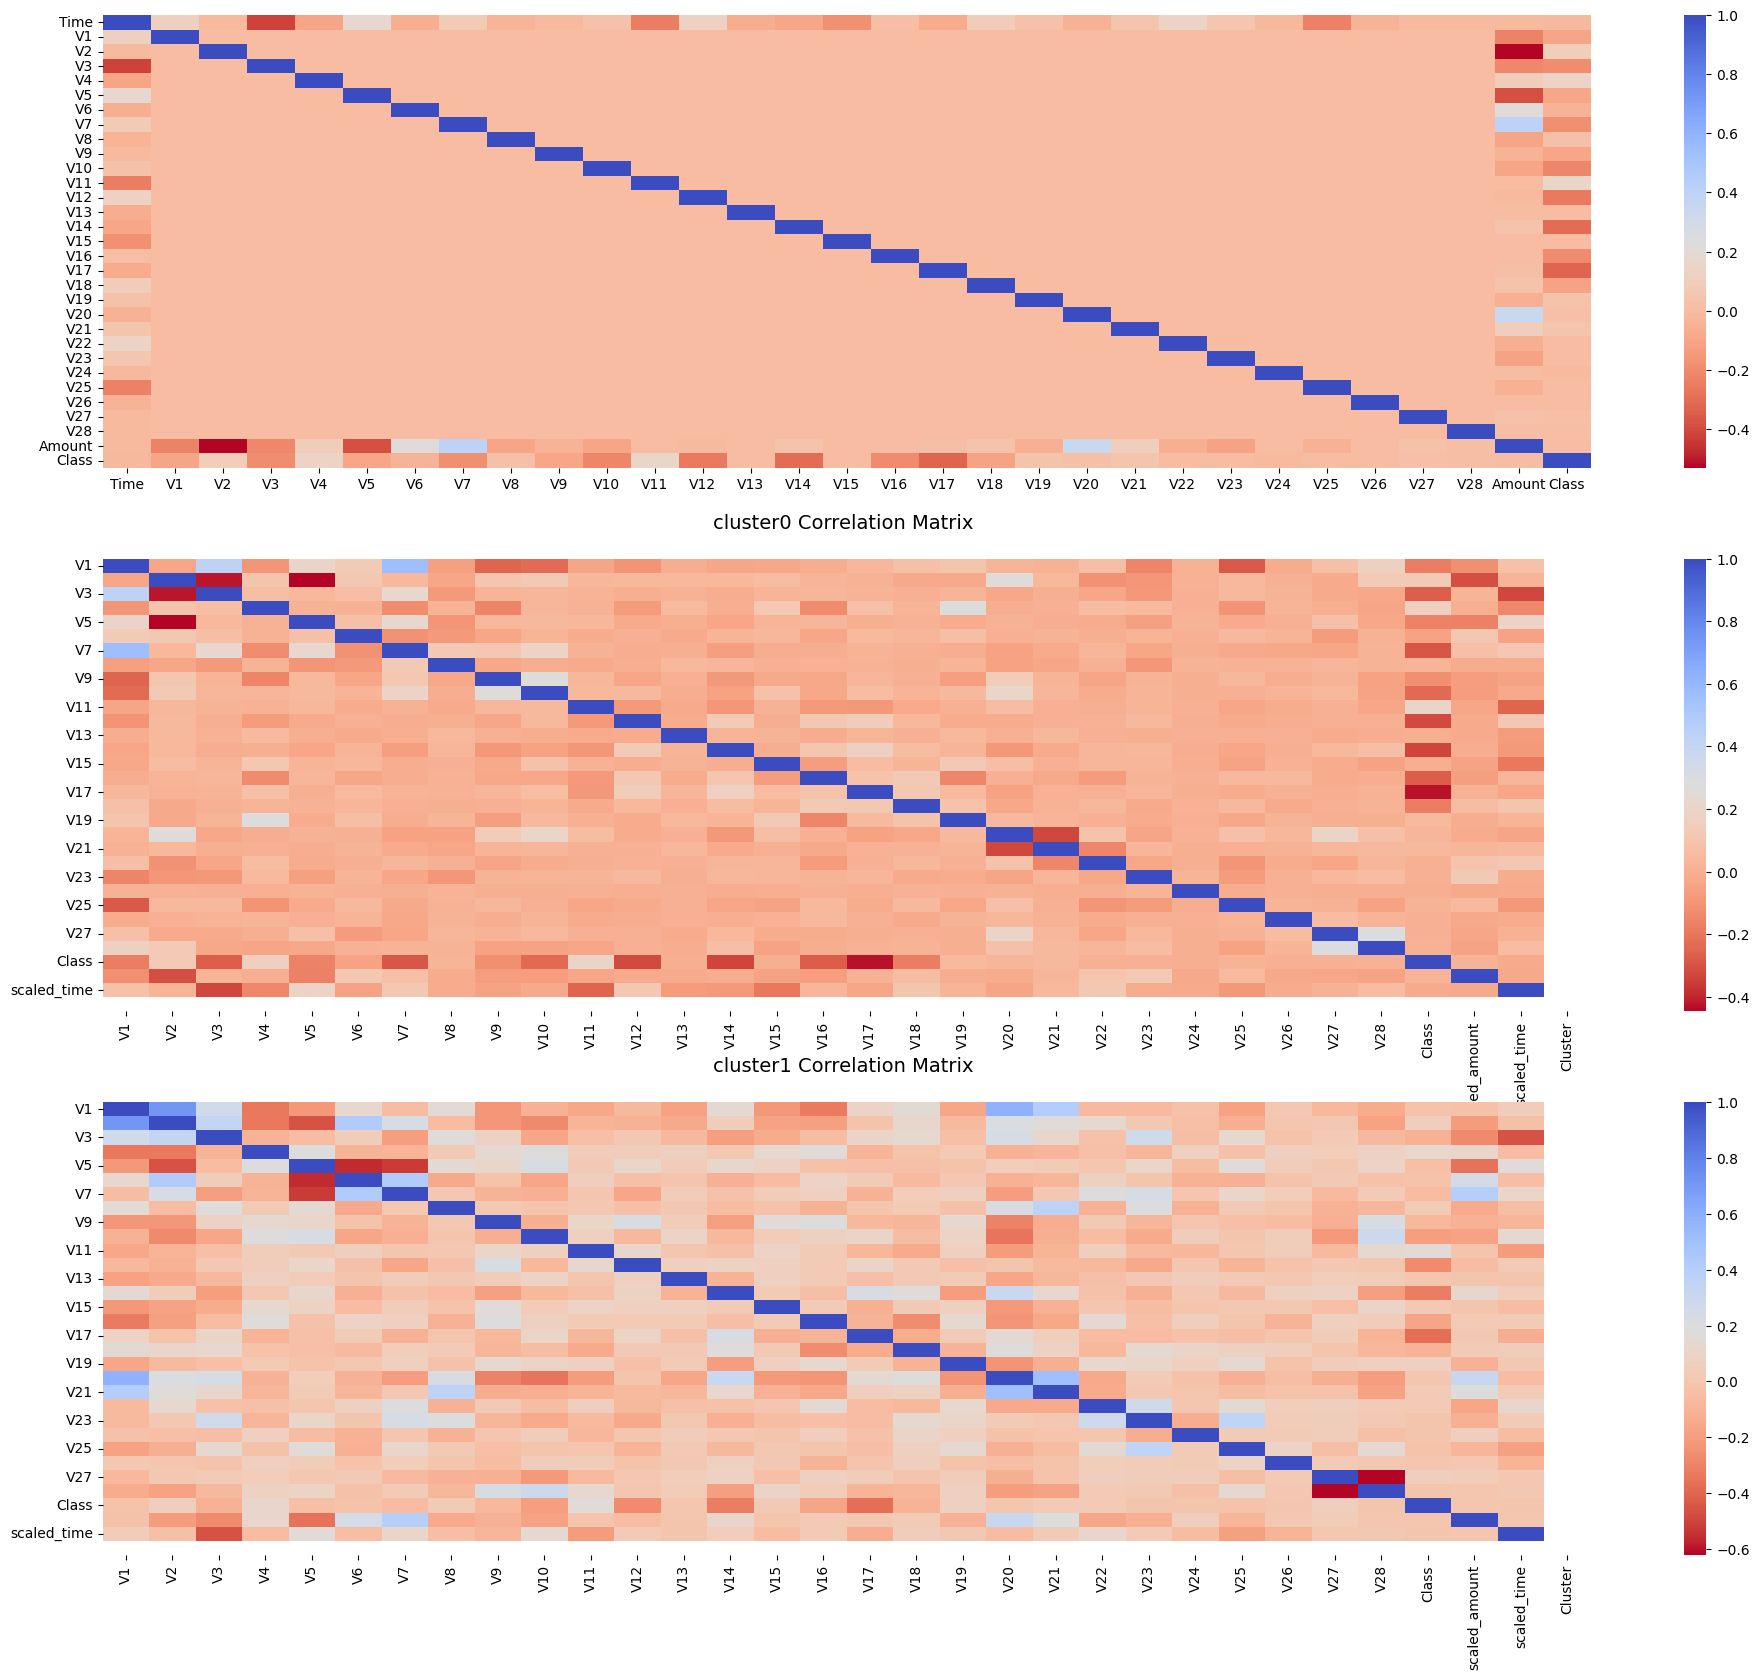

In [12]:
# Entire DataFrame
f, (ax0, ax1,ax2) = plt.subplots(3, 1, figsize=(24,20))

corr0 = data.corr()
sns.heatmap(corr0, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax0)
ax1.set_title("main data Correlation Matrix \n", fontsize=14)

corr1 = cluster_1.corr()
sns.heatmap(corr1, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("cluster0 Correlation Matrix \n", fontsize=14)

corr2 = cluster_2.corr()
sns.heatmap(corr2, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("cluster1 Correlation Matrix \n", fontsize=14)


SVM

In [18]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
from sklearn.model_selection import train_test_split
data = data.sample(frac=1)
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0]
train_non_fraud, test_non_fraud, _, _ = train_test_split(non_fraud_df,non_fraud_df, test_size=0.2, random_state=42)
train_fraud, test_fraud, _, _ = train_test_split(fraud_df, fraud_df, test_size=0.2, random_state=42)

train=pd.concat([train_fraud, train_non_fraud], ignore_index=True)
test=pd.concat([test_fraud, test_non_fraud], ignore_index=True)
train=train.sample(frac=1)
test=test.sample(frac=1)


# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train['scaled_amount'] = rob_scaler.fit_transform(train['Amount'].values.reshape(-1,1))
train['scaled_time'] = rob_scaler.fit_transform(train['Time'].values.reshape(-1,1))
train.drop(['Time','Amount'], axis=1, inplace=True)

test['scaled_amount'] = rob_scaler.transform(test['Amount'].values.reshape(-1,1))
test['scaled_time'] = rob_scaler.transform(test['Time'].values.reshape(-1,1))
test.drop(['Time','Amount'], axis=1, inplace=True)

new_fraud_train = train.loc[train['Class'] == 1]
new_fraud_train=new_fraud_train.sample(n=20000,replace=True)

new_non_fraud_train = train.loc[data['Class'] == 0][:len(new_fraud_train. index)*5]


normal_distributed_df = pd.concat([new_fraud_train, new_non_fraud_train])

# Shuffle dataframe rows
new_df=train
# new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
130448,-0.592488,1.517981,-0.662017,0.147385,1.741150,-0.272377,1.430968,0.025736,-0.650087,-0.691109,...,0.108066,-0.457133,0.125962,0.534415,-0.514505,0.220137,0.212344,0,-0.204947,0.412744
225963,-5.463182,3.902162,-0.751383,0.289291,-1.267782,1.595147,-5.296716,-11.348618,-0.692131,-0.652036,...,-2.347747,0.915082,0.138059,-0.036299,0.222369,0.106116,-0.130730,0,-0.243296,-0.061260
181718,1.259083,-0.061042,-1.586239,-0.615404,2.294742,3.017576,-0.106586,0.668462,-0.316571,-0.012654,...,-1.472489,0.075689,0.991760,0.428575,0.149424,-0.069748,0.009795,0,0.359872,-0.043666
184367,-0.448579,1.105701,1.430964,0.042524,0.509050,-0.387055,0.749427,-0.277014,0.791243,-0.408682,...,-0.759093,-0.078040,-0.094461,-0.185484,-0.006813,-0.082644,-0.133390,0,-0.055718,-0.881455
18615,-0.552709,1.752280,-1.127471,1.066697,1.122525,-0.315990,1.769476,-0.269151,-0.945385,-0.696626,...,0.544110,-0.222268,0.537381,-0.030302,-0.481658,-0.261287,-0.093393,0,1.076838,0.815467


C:\Users\Javad\AppData\Local\Temp\ipykernel_5980\2740622530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette=colors)


<AxesSubplot:xlabel='Class', ylabel='count'>

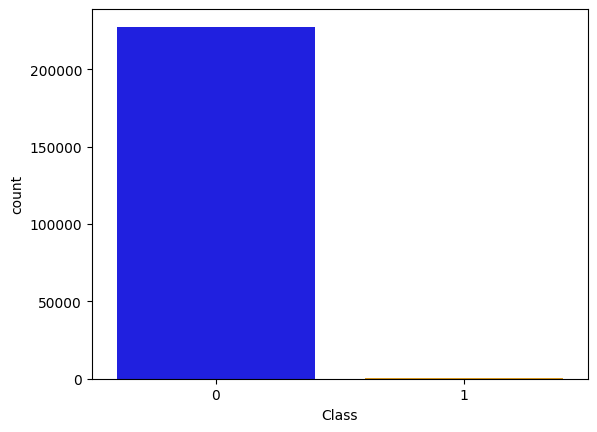

In [19]:
import seaborn as sns

colors = ["blue", "orange"]
sns.countplot(x='Class', data=new_df, palette=colors)


Confusion Matrix:
[[56860     3]
 [   36    63]]


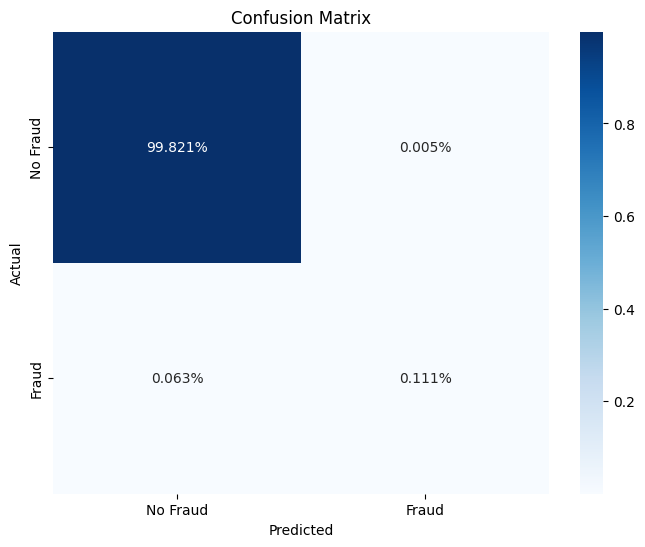

Accuracy: 0.9993153330290369
Precision: 0.9545454545454546
Recall: 0.6363636363636364
F1 Score: 0.7636363636363637


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns


# Create and train the SVM model
svm_model = SVC()
svm_model.fit(new_df.drop('Class',axis=1), new_df['Class'])

# Make predictions on the test set
y_pred = svm_model.predict(test.drop('Class',axis=1))


# Calculate the confusion matrix
confusion_mat = confusion_matrix(test['Class'], y_pred)
print("Confusion Matrix:")
print(confusion_mat)
confusion_mat=confusion_mat/sum(sum(confusion_mat))
import matplotlib.pyplot as plt

# Define the labels for the confusion matrix
labels = ['No Fraud', 'Fraud']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='.3%', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute and print metrics
print("Accuracy:", accuracy_score(test['Class'], y_pred))
print("Precision:", precision_score(test['Class'], y_pred, pos_label=1))
print("Recall:", recall_score(test['Class'], y_pred, pos_label=1))
print("F1 Score:", f1_score(test['Class'], y_pred, pos_label=1))
